In [43]:
import scipy as sp
import numpy as np
from scipy.spatial import ConvexHull

In [44]:
h = 1/np.sqrt(5)
xp = 1/2. + np.sqrt(5)/10
xm = 1/2. - np.sqrt(5)/10
isovertices = np.array([
    [0,0,1],
    [-2 * h, 0, h],
    [xp, np.sqrt(xm), h],
    [-1 * xm, -1 * np.sqrt(xp), h ],
    [-1 * xm,  np.sqrt(xp), h ],
    [xp, -1 * np.sqrt(xm), h],
    
    
])

isovertices = np.concatenate((isovertices, -1.0 * isovertices), axis = 0)
hull = ConvexHull(isovertices)

In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

def plotsimplices(triangles, vertices):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    x = vertices[:,0]
    y = vertices[:,1]
    z = vertices[:,2]
    # The triangles in parameter space determine which x, y, z points are
    # connected by an edge
    #ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
    ax.plot_trisurf(x, y, z, triangles=triangles, cmap=plt.cm.Spectral)

In [46]:
def sphericalmidpoint(a,b):
    return (a + b)/ np.linalg.norm(a+b)

def subdivide(triangles, vertices):
    newvertices = np.copy(vertices)
    for triangle in triangles:
        v0 = vertices[triangle[0]]
        v1 = vertices[triangle[1]]
        v2 = vertices[triangle[2]]
        #print(v0)
        #print(newvertices)
        newvertices = np.append(newvertices, [sphericalmidpoint(v0,v1)] ,axis = 0 )
        newvertices = np.append(newvertices, [sphericalmidpoint(v1,v2) ],axis = 0)
        newvertices = np.append(newvertices, [sphericalmidpoint(v0,v2)] ,axis = 0)


    return newvertices


In [47]:
from scipy.spatial import SphericalVoronoi 
dualiso = SphericalVoronoi(isovertices)

In [48]:
dualiso.vertices

array([[ -4.91123473e-01,   3.56822090e-01,   7.94654472e-01],
       [ -4.91123473e-01,  -3.56822090e-01,   7.94654472e-01],
       [  1.87592474e-01,   5.77350269e-01,   7.94654472e-01],
       [ -7.94654472e-01,   5.77350269e-01,   1.87592474e-01],
       [  4.91123473e-01,  -3.56822090e-01,  -7.94654472e-01],
       [  3.03530999e-01,   9.34172359e-01,   1.87592474e-01],
       [  4.91123473e-01,   3.56822090e-01,  -7.94654472e-01],
       [  7.94654472e-01,   5.77350269e-01,  -1.87592474e-01],
       [ -3.03530999e-01,   9.34172359e-01,  -1.87592474e-01],
       [ -1.87592474e-01,   5.77350269e-01,  -7.94654472e-01],
       [  9.82246946e-01,   1.98076050e-17,   1.87592474e-01],
       [  6.07061998e-01,   0.00000000e+00,   7.94654472e-01],
       [  1.87592474e-01,  -5.77350269e-01,   7.94654472e-01],
       [  7.94654472e-01,  -5.77350269e-01,  -1.87592474e-01],
       [  3.03530999e-01,  -9.34172359e-01,   1.87592474e-01],
       [ -6.07061998e-01,   0.00000000e+00,  -7.9465447

In [49]:
print(len(dualiso.regions))
print(len(isovertices))

12
12


In [50]:
dualiso.regions

[[0, 1, 2, 11, 12],
 [0, 1, 3, 16, 17],
 [2, 5, 7, 10, 11],
 [1, 12, 14, 16, 18],
 [0, 2, 3, 5, 8],
 [10, 11, 12, 13, 14],
 [4, 6, 9, 15, 19],
 [4, 6, 7, 10, 13],
 [15, 16, 17, 18, 19],
 [5, 6, 7, 8, 9],
 [4, 13, 14, 18, 19],
 [3, 8, 9, 15, 17]]

In [51]:
print(len(hull.simplices))
print(len(dualiso.vertices))


20
20


In [52]:
dualiso.sort_vertices_of_regions()

So we see that the dualiso has faces wherever the iso has vertices and vice versa. Good.

In [53]:
def dualTriangles(voronoi):
    simplices = []
    vertices = []
    index = 0
    for j in range(len(voronoi.points)):
        region = voronoi.regions[j]
        point = voronoi.points[j]
        for i in range(len(region)):
            simplices.append([index,index+1, index+2])
            #simplices.append([point ,voronoi.vertices[i-1], voronoi.vertices[i]])
            vertices.append(point)
            vertices.append(voronoi.vertices[region[i-1]])
            vertices.append(voronoi.vertices[region[i]])
            
            index += 3
    return simplices, np.array(vertices)


<IPython.core.display.Javascript object>


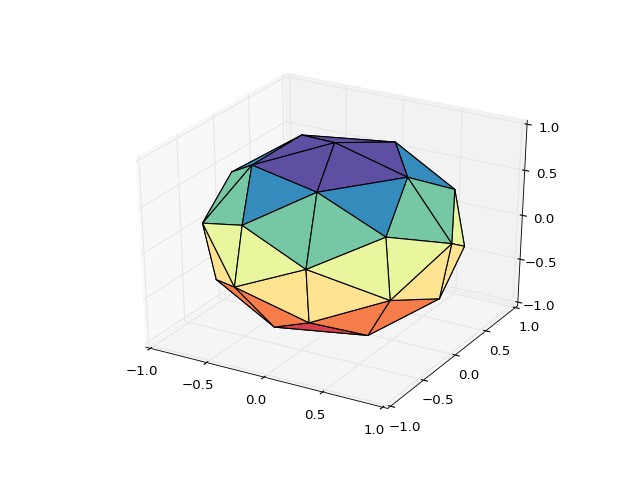

In [57]:
simplices, vertices = dualTriangles(dualiso)
#print(simplices)
#print(vertices)
plotsimplices(simplices,vertices)

<IPython.core.display.Javascript object>


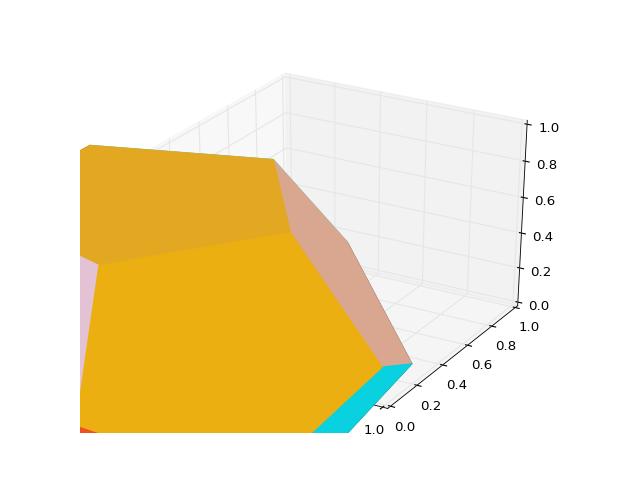

In [58]:
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from scipy.spatial import SphericalVoronoi
from mpl_toolkits.mplot3d import proj3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for region in dualiso.regions:
    random_color = colors.rgb2hex(np.random.rand(3))
    polygon = Poly3DCollection([dualiso.vertices[region]], alpha=1.0)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)


Yeah it would be easy to construct the area correponding to each vertex

In [59]:
dualiso

In [79]:
def dualedge(v1, v2, dual):
    list1 = dual.regions[v1]
    list2 = dual.regions[v2]
    return list(set(list1).intersection(list2))
def dualface(v1, dual):
    return dual.regions[v1]
def dualpoint(triangle, dual): 
    dualvertset = set(dual.regions[triangle[0]])
    dualvertset.intersection(set(dual.regions[triangle[1]]))
    dualvertset.intersection(set(dual.regions[triangle[2]]))
    return list(dualvertset)[0]
    

In [66]:
hull.simplices[0]

array([0, 4, 1], dtype=int32)

In [69]:
dualedge(0,4,dualiso)

[0, 2]

In [70]:
dualedge(0,1,dualiso)

[0, 1]

In [74]:
dualedge(4,1,dualiso)

[0, 3]

In [78]:
dualpoint([0,4,1], dualiso)

{0, 1, 2, 11, 12}


0

In [80]:
def sphericalmidpoint(a,b):
    return (a + b)/ np.linalg.norm(a+b)

def subdivide(triangles, vertices):
    newvertices = np.copy(vertices)
    for triangle in triangles:
        v0 = vertices[triangle[0]]
        v1 = vertices[triangle[1]]
        v2 = vertices[triangle[2]]
        #print(v0)
        #print(newvertices)
        newvertices = np.append(newvertices, [sphericalmidpoint(v0,v1)] ,axis = 0 )
        newvertices = np.append(newvertices, [sphericalmidpoint(v1,v2) ],axis = 0)
        newvertices = np.append(newvertices, [sphericalmidpoint(v0,v2)] ,axis = 0)


    return newvertices

<IPython.core.display.Javascript object>


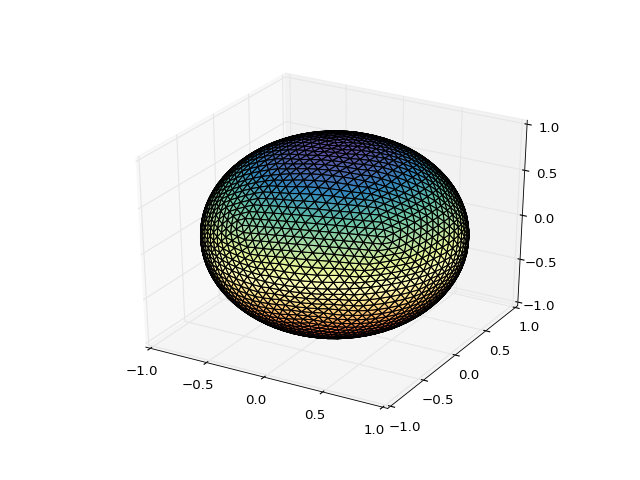

In [81]:
hull2 = hull
subverts = isovertices
for i in range(4):
    subverts = subdivide(hull2.simplices, subverts)
    hull2 = ConvexHull(subverts)


plotsimplices(hull2.simplices, subverts)

In [117]:
convexhullpoints = np.array(list(map( lambda index: hull2.points[index] , hull2.vertices )))
convexhullpoints.shape

(2562, 3)

In [118]:
hull3 = ConvexHull(convexhullpoints)

In [119]:
dualiso2 = SphericalVoronoi(convexhullpoints)

<IPython.core.display.Javascript object>


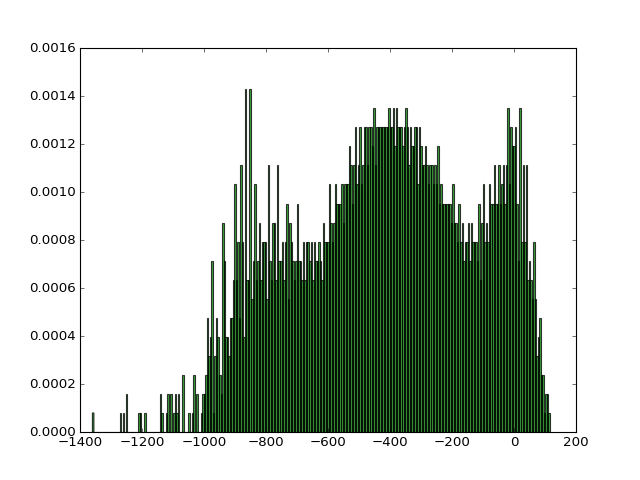

[-1359.98577049 -1266.65339307 -1260.47470016 ...,   108.26239819
   110.81519065   116.00883077]


In [128]:
from scipy.linalg import eigvalsh
N = hull3.vertices.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
norm = np.linalg.norm
for triangle in  hull3.simplices:
    dualvert =  dualpoint(triangle, dualiso2)
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        edgelength = norm(hull3.points[a] - hull3.points[b])
        [x, y] = dualedge(a,b,dualiso2)
        duallength = norm(dualiso2.vertices[x] - dualiso2.vertices[y])
        amp = duallength / edgelength
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        
        A[a,a] += norm(np.cross( hull3.points[a] - hull3.points[b], dualiso2.vertices[dualvert] - hull3.points[a] )) / 4.0
        A[b,b] += norm(np.cross( hull3.points[a] - hull3.points[b], dualiso2.vertices[dualvert] - hull3.points[b] )) / 4.0

K = K / 2. #I think I double count every edge
energies = eigvalsh(K,b=A)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies)

In [108]:
len(dualiso2.regions)
len(subverts)

5112

In [91]:
N = hull2.simplices.shape[0]
N

5120

In [102]:
hull2.vertices.shape

(2562,)

In [97]:
hull2.points.shape

(5112, 3)

In [98]:
len(subverts)

5112

In [107]:
len(dualiso2.regions)

2562

<IPython.core.display.Javascript object>


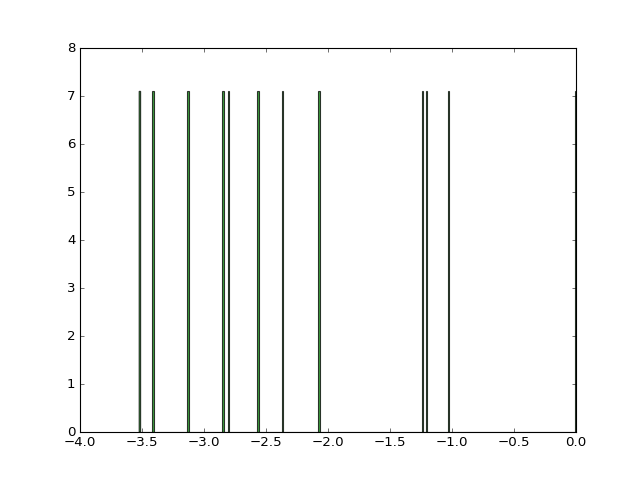

[ -3.52280791e+00  -3.41061245e+00  -3.12461028e+00  -2.84697992e+00
  -2.79752706e+00  -2.56492196e+00  -2.36950715e+00  -2.07129364e+00
  -1.24270819e+00  -1.19948935e+00  -1.02764303e+00  -1.27960380e-16]


In [127]:
from scipy.linalg import eigvalsh
N = hull.vertices.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
norm = np.linalg.norm
for triangle in  hull.simplices:
    dualvert =  dualpoint(triangle, dualiso)
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        edgelength = norm(hull.points[a] - hull.points[b])
        [x, y] = dualedge(a,b,dualiso)
        duallength = norm(dualiso.vertices[x] - dualiso.vertices[y])
        amp = duallength / edgelength
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        
        A[a,a] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[a] )) / 4.0
        A[b,b] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[b] )) / 4.0

K = K / 2. #I think I double count every edge
energies = eigvalsh(K,b=A)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies)

Try Cot formula

<IPython.core.display.Javascript object>


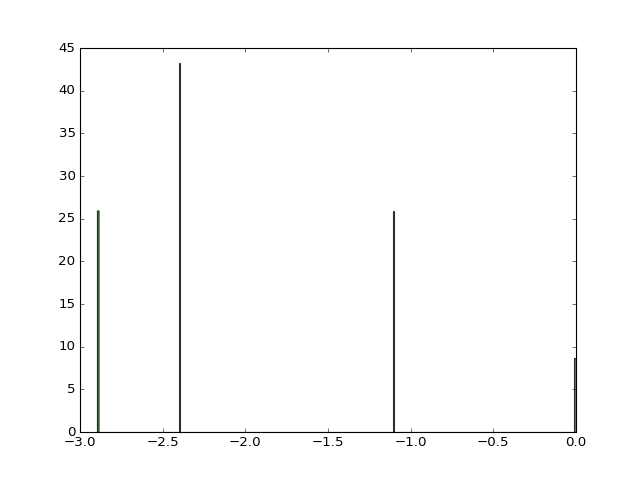

[ -2.89442719e+00  -2.89442719e+00  -2.89442719e+00  -2.40000000e+00
  -2.40000000e+00  -2.40000000e+00  -2.40000000e+00  -2.40000000e+00
  -1.10557281e+00  -1.10557281e+00  -1.10557281e+00  -2.77555756e-16]


In [138]:
from scipy.linalg import eigvalsh
N = hull.vertices.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
norm = np.linalg.norm
for triangle in  hull.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        c = triangle[i-2]
        ac = hull.points[a] - hull.points[c]
        
        bc = hull.points[b] - hull.points[c]
        cosalph = np.dot(ac,bc) / norm(ac) / norm(bc)
        sinalph = norm(np.cross(ac,bc)) / norm(ac) / norm(bc)
        amp = cosalph / sinalph
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        
        A[b,b] += sinalph/6
        A[a,a] += sinalph/6
        
        #A[a,a] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[a] )) / 4.0
        #A[b,b] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[b] )) / 4.0

K = K / 2. #I think I double count every edge
energies = eigvalsh(K, b = A)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies)

<IPython.core.display.Javascript object>


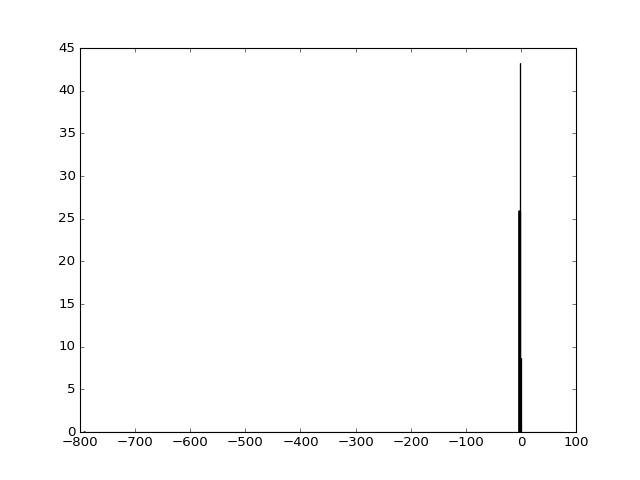

[-793.06418021 -788.79163781 -776.74458603 ...,   66.46243683   68.07019228
   76.0370631 ]


In [133]:
from scipy.linalg import eigvalsh
N = hull3.vertices.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
norm = np.linalg.norm
for triangle in  hull3.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        c = triangle[i-2]
        ac = hull3.points[a] - hull3.points[c]
        
        bc = hull3.points[b] - hull3.points[c]
        # can acutally avoid the normalization since it cancels in amp anyhow
        cosalph = np.abs(np.dot(ac,bc)) # / norm(ac) / norm(bc)
        sinalph = norm(np.cross(ac,bc)) # / norm(ac) / norm(bc)
        amp = cosalph / sinalph
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        
        A[b,b] += sinalph/6
        A[a,a] += sinalph/6
        
        #A[a,a] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[a] )) / 4.0
        #A[b,b] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[b] )) / 4.0

K = K / 2. #I think I double count every edge
energies = eigvalsh(K,b=A)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies)